<a href="https://colab.research.google.com/github/gemdata0/KEMRI_Customer_Satisfaction./blob/main/KEMRI_Customer_Satisfaction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Executive Summary**

Learning and understanding customer response and satisfaction towards the services and products
offered is very important especially in that it is an eye opener to how services and products can be
improved.

Offering quality products and services ensures that there is a high customer retention rate and the
current customer refer the businesses product to other potential customers. This ensures that the
business remains profitable and competitive in its industry.
The main objective of this study is to learn from previous customers, what services and products
should be improved to ensure that future customers have a more worthwhile experience at KEMRI.

We are also looking at creating a model that predicts whether a customer would recommend KEMRI
products to other potential customers as our secondary objective.



# **Loading and Viewing the data**

In [3]:
# Importing libraries  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the data
data = pd.read_excel('Customer Satisfaction dataset.xlsx')

In [5]:
# Viewing the first 5 rows 
data.head(5)

,Serial_number,Department_visited,Date,Gender,Age,Organisation_represented,Reception_at_the_gate,Services_at_the_reception_area,Reception_area_facilities,Proffessionalism,...,Procurement,Scientific,Academic Attachments,Information Requesting,Others Services,Any_problems_encountered_explain_if_yes,Overall_satisfaction,REFER_SOMEBODY_KEMRI,Coment,How_to_improve_services
0,kemri_01,KEMRI CENTRAL LABORATORIES,2015-08-26 00:00:00,Female,57,NGO,Satisfied,Satisfied,Satisfied,Satisfied,...,0,0,1,1,NaN,NO,Satisfied,YES,Would you like to visit the department with th...,Visitors could be advised on departments that ...
1,kemri_02,Research Partners Laboratory,14/09/2018,Male,26,Service Provider,Satisfied,Satisfied,Satisfied,Satisfied,...,0,0,0,1,NaN,No,Extremely Satified,YES,GOOD RECEPTION AND SERVICES,NaN
2,kemri_03,ADMINISTRATION OFFICES,14/09/2018,Female,40,Service Provider,Satisfied,Satisfied,Satisfied,Satisfied,...,0,0,0,1,NaN,No,Extremely Satified,YES,NaN,NaN
3,kemri_04,KEMRI CENTRAL LABORATORIES,2015-10-03 00:00:00,Female,59,student,Satisfied,Satisfied,Neutral,Satisfied,...,0,0,1,1,NaN,No,Somewhat,YES,Would have wished to visit more labs than the ...,Give more information and a bit longer time in...
4,kemri_05,ANIMAL FACILITIES,2015-08-26 00:00:00,Female,33,Service Provider,Satisfied,Satisfied,Satisfied,Satisfied,...,0,1,0,0,NaN,NO,Satisfied,YES,NaN,NaN


# **Data Cleaning**

**Removing white spaces in the column names**

In [6]:
# Removing the white spaces from the data to bring consistency in the column names.
data.columns = data.columns.str.strip()

**Sorting the date from the least to the most recent date**

In [7]:
# Selecting the date column and sorting the data from the least recent to the most recent date.
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by = 'Date')

**Correcting spelling error in the data**

In [8]:
# Finding extremely satisfied (wrongly spelled) and replacing with extremely satisfied (correct spelling) in the overall satisfaction for more consistency.
data['Overall_satisfaction'] = data['Overall_satisfaction'].replace('extremely satified','extremely satisfied')

**Checking further information in the data**

In [9]:
# Checking for more information on the data
data.info()
# There are 27 columns and 297 rows. 
# The data types are objects and integers.
# From here, there are missing values in some of the columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 240 to 88
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Serial_number                            297 non-null    object        
 1   Department_visited                       297 non-null    object        
 2   Date                                     297 non-null    datetime64[ns]
 3   Gender                                   297 non-null    object        
 4   Age                                      297 non-null    int64         
 5   Organisation_represented                 297 non-null    object        
 6   Reception_at_the_gate                    297 non-null    object        
 7   Services_at_the_reception_area           297 non-null    object        
 8   Reception_area_facilities                297 non-null    object        
 9   Proffessionalism                         2

In [10]:
# A statistical description of the data.
data.describe(include = 'object')

,Serial_number,Department_visited,Gender,Organisation_represented,Reception_at_the_gate,Services_at_the_reception_area,Reception_area_facilities,Proffessionalism,General_presentation,Efficiency,Quality_of_advice_received,Knowledge_of_staff_on_products,Recomendation_on_KEMRI_products,Others Services,Any_problems_encountered_explain_if_yes,Overall_satisfaction,REFER_SOMEBODY_KEMRI,Coment,How_to_improve_services
count,297,297,297,297,297,297,297,297,297,297,297,297,296,129,297,297,297,176,158
unique,297,17,3,15,3,3,3,2,3,2,3,3,4,23,12,6,3,142,141
top,kemri_241,KEMRI CENTRAL LABORATORIES,Male,Service Provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,0,No,Satisfied,YES,GOOD,Making more awareness in terms of enlightening...
freq,1,100,165,104,273,274,257,264,264,262,268,254,269,77,163,195,293,9,2


**Checking for duplicated values**

In [11]:
# Checking if there are duplicates in the data
data.duplicated().sum()
# There are no duplicated valus in the data 

0

**Checking and Replacing missing values in the data**

In [12]:
# Checking if there are null values in the data 
data.isnull().sum()
# Most of the columns did not have missing values.
# Other than 4 rows ie:
                        # 1. Recomendation_on_KEMRI_products
                        # 2. Others Services
                        # 3. Coment
                        # 4. How_to_improve_services

Serial_number                                0
Department_visited                           0
Date                                         0
Gender                                       0
Age                                          0
Organisation_represented                     0
Reception_at_the_gate                        0
Services_at_the_reception_area               0
Reception_area_facilities                    0
Proffessionalism                             0
General_presentation                         0
Efficiency                                   0
Quality_of_advice_received                   0
Knowledge_of_staff_on_products               0
Recomendation_on_KEMRI_products              1
Diagnostic                                   0
Payments                                     0
Procurement                                  0
Scientific                                   0
Academic Attachments                         0
Information Requesting                       0
Others Servic

In [13]:
# Filling the Recomendation_on_KEMRI_products column with the mode value.
# Since there is only one missing value and the mode value is the most common value of the two and it makes a lot of sense to replace the missing value with the mode value.
data['Recomendation_on_KEMRI_products'] = data['Recomendation_on_KEMRI_products'].fillna(data['Recomendation_on_KEMRI_products'].mode()[0])

In [14]:
# Replacing the missing values with N/A
data[['Others Services', 'Coment', 'How_to_improve_services']].replace('', np.NaN)
# Filling the other services, coment and how to improve services with NaN to clearly show the missing values in the data.

,Others Services,Coment,How_to_improve_services
240,NaN,GOOD,NaN
160,NaN,Good service overall,Making more awareness in terms of enlightening...
157,job vacancy,satisfactory,NaN
170,Introduction to our financial services,NaN,Please kindly empasize on stigma to cigarette ...
60,NaN,so ar so goog.Keep it up,NaN
...,...,...,...
18,0,NaN,NaN
16,1,NaN,NaN
68,0,JUST IMPROVE ON PAYMENT,IMPROVISING THE SERVICES
79,0,NaN,"PROMPT PAYMENT,DIGITISE SERVICES"


**Changing the data to lowercase for consistency**

In [15]:
# Changing the data to lowercase for consistency.
cols = data.select_dtypes('object').columns
data[cols] = data[cols].apply(lambda x: x.astype(str).str.lower())
data.head(6)

,Serial_number,Department_visited,Date,Gender,Age,Organisation_represented,Reception_at_the_gate,Services_at_the_reception_area,Reception_area_facilities,Proffessionalism,...,Procurement,Scientific,Academic Attachments,Information Requesting,Others Services,Any_problems_encountered_explain_if_yes,Overall_satisfaction,REFER_SOMEBODY_KEMRI,Coment,How_to_improve_services
240,kemri_241,outpatient services at kemri research clinic,2015-01-30,male,28,did not disclose,satisfied,neutral,satisfied,satisfied,...,0,0,0,0,nan,no,satisfied,yes,good,nan
160,kemri_161,kemri kenyatta hospital based laboratories,2015-03-25,male,42,ngo,satisfied,satisfied,satisfied,satisfied,...,0,0,0,0,nan,no,satisfied,yes,good service overall,making more awareness in terms of enlightening...
157,kemri_158,administration offices,2015-03-26,male,25,ngo,satisfied,satisfied,satisfied,satisfied,...,0,0,0,1,job vacancy,no,satisfied,yes,satisfactory,nan
170,kemri_171,administration offices,2015-04-09,male,41,service provider,satisfied,satisfied,satisfied,satisfied,...,0,0,0,0,introduction to our financial services,no,satisfied,yes,nan,please kindly empasize on stigma to cigarette ...
60,kemri_61,kemri kenyatta hospital based laboratories,2015-05-22,female,28,did not disclose,satisfied,satisfied,satisfied,satisfied,...,0,0,1,0,nan,no,extremely satisfied,yes,so ar so goog.keep it up,nan
268,c33,kemri kenyatta hospital based laboratories,2015-05-22,female,28,did not disclose,satisfied,satisfied,satisfied,satisfied,...,0,0,1,0,nan,no,extremely satisfied,yes,so ar so goog.keep it up,nan


#**Uni-variate Analysis**

**Visualization of the target column**

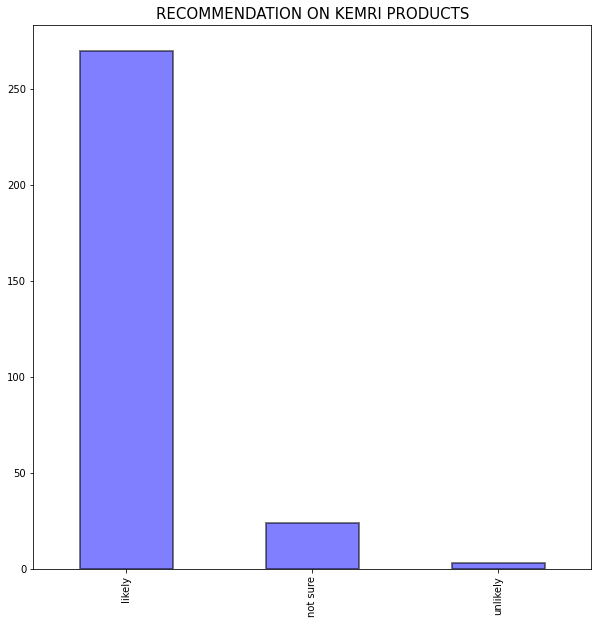

In [16]:
# A visualization of the 'Recomendation_on_KEMRI_products'
fig, axes = plt.subplots(figsize = (10,10))
plt.title('RECOMMENDATION ON KEMRI PRODUCTS', size = 15)
data['Recomendation_on_KEMRI_products'].value_counts().plot(kind = 'bar', color = 'blue', linewidth = 2, edgecolor = 'black', alpha = 0.5);
# From this it is clear that most people would refer KEMRI products to other people
# A few people are not sure and very little are unlikely to recommend some products.

# The main aim is to make sure that all people in contact with KEMRI would recommend KEMRI products to other people.

# There is large class imbalance if we are to proceed with classification

**Age Distribution**

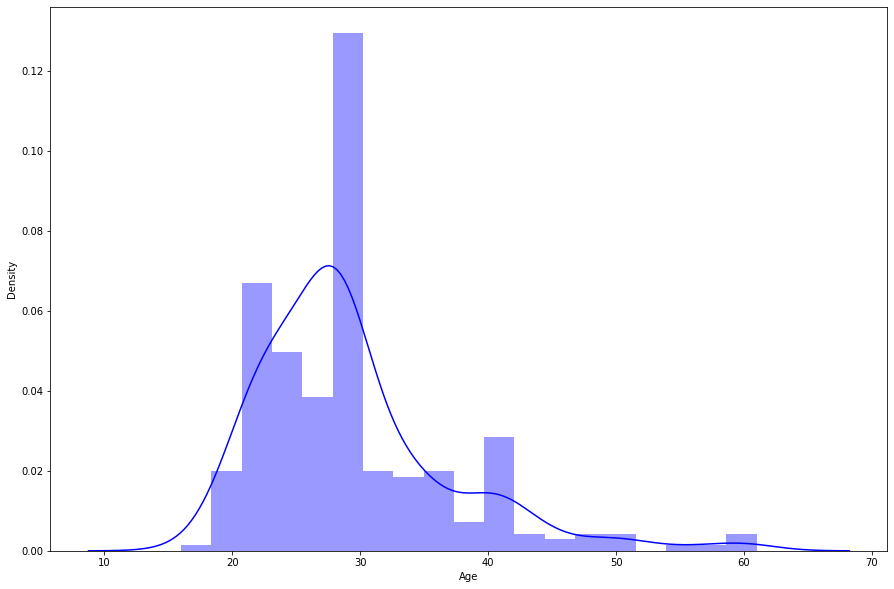

In [17]:
fig, axes = plt.subplots(figsize = (15,10))
sns.distplot(data['Age'], color = 'blue');
# Most people are aged between the ages 20 and around 35 years.

**Gender Distribution**

In [18]:
data['Gender'] = np.where(data['Gender'] == "female", 'female', 'male')
data['Gender'].value_counts()

male      166
female    131
Name: Gender, dtype: int64

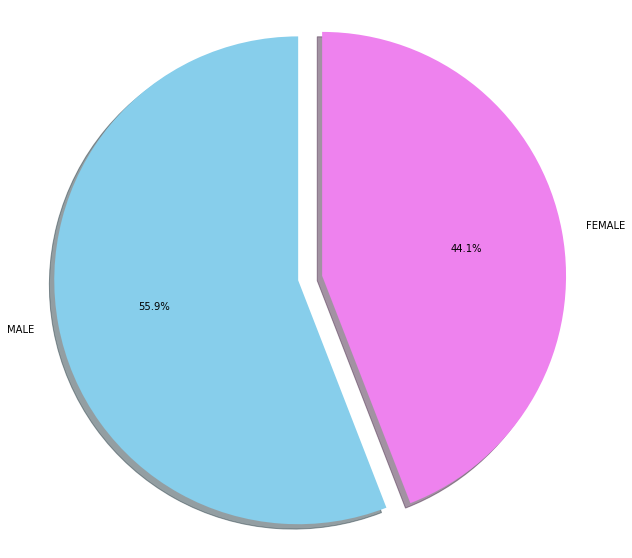

In [19]:
# Pie chart
labels = ('MALE', 'FEMALE')
sizes = [166, 131]
colors = ('skyblue', 'violet')
explode = (0.1, 0)

fig, axes = plt.subplots(figsize = (10,10))
axes.pie(sizes, labels = labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors)
axes.axis('equal');

# There are slighly more males than females in the data.

**Organisation Represented**

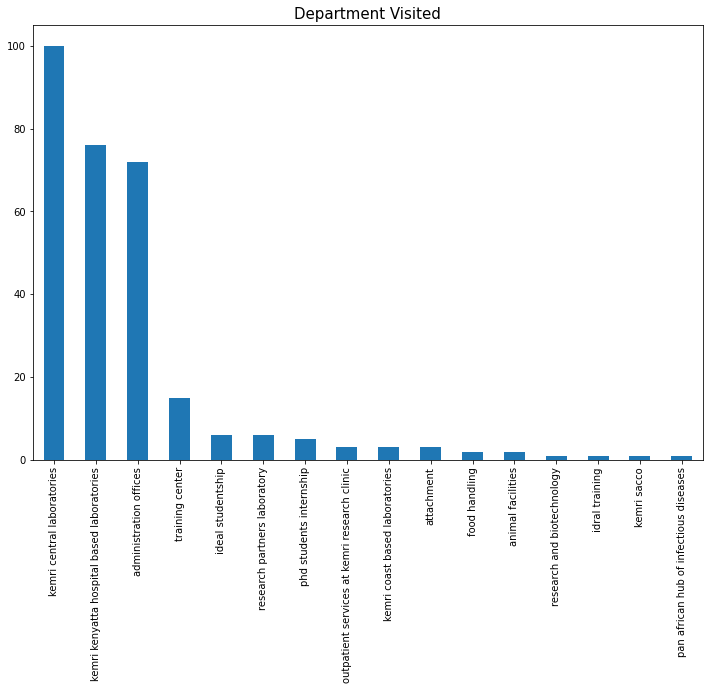

In [20]:
fig, axes = plt.subplots(figsize = (12,8))
data['Department_visited'].value_counts().plot(kind = 'bar')
plt.title('Department Visited', size = 15);

**Organisation Represented**

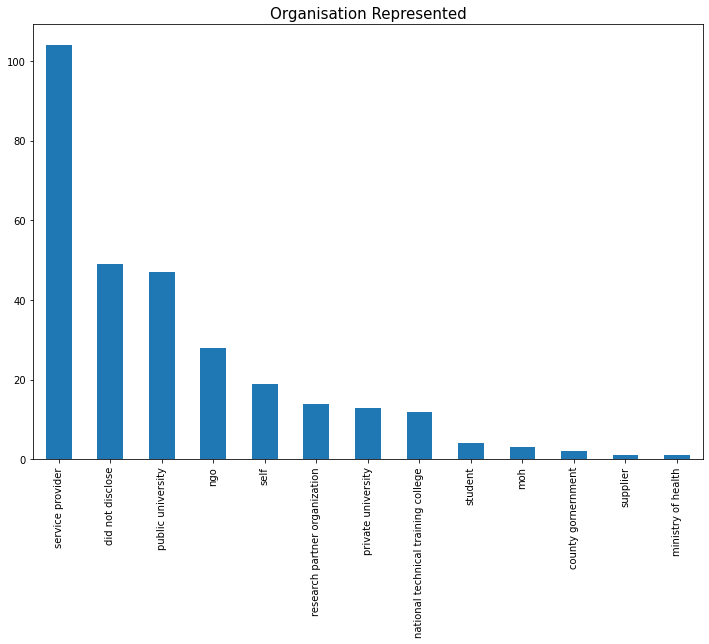

In [21]:
fig, axes = plt.subplots(figsize = (12,8))
data['Organisation_represented'].value_counts().plot(kind = 'bar')
plt.title('Organisation Represented', size = 15);

**Visualization of the rating columns**

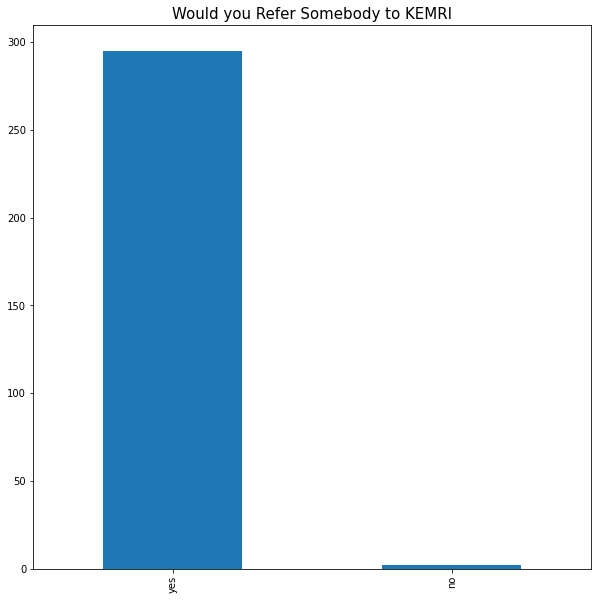

In [22]:
data['REFER_SOMEBODY_KEMRI'] = np.where(data['REFER_SOMEBODY_KEMRI'] == "not sure", 'no', 'yes')

fig, axes = plt.subplots(figsize = (10,10))
data['REFER_SOMEBODY_KEMRI'].value_counts().plot(kind = 'bar')
plt.title('Would you Refer Somebody to KEMRI', size = 15);

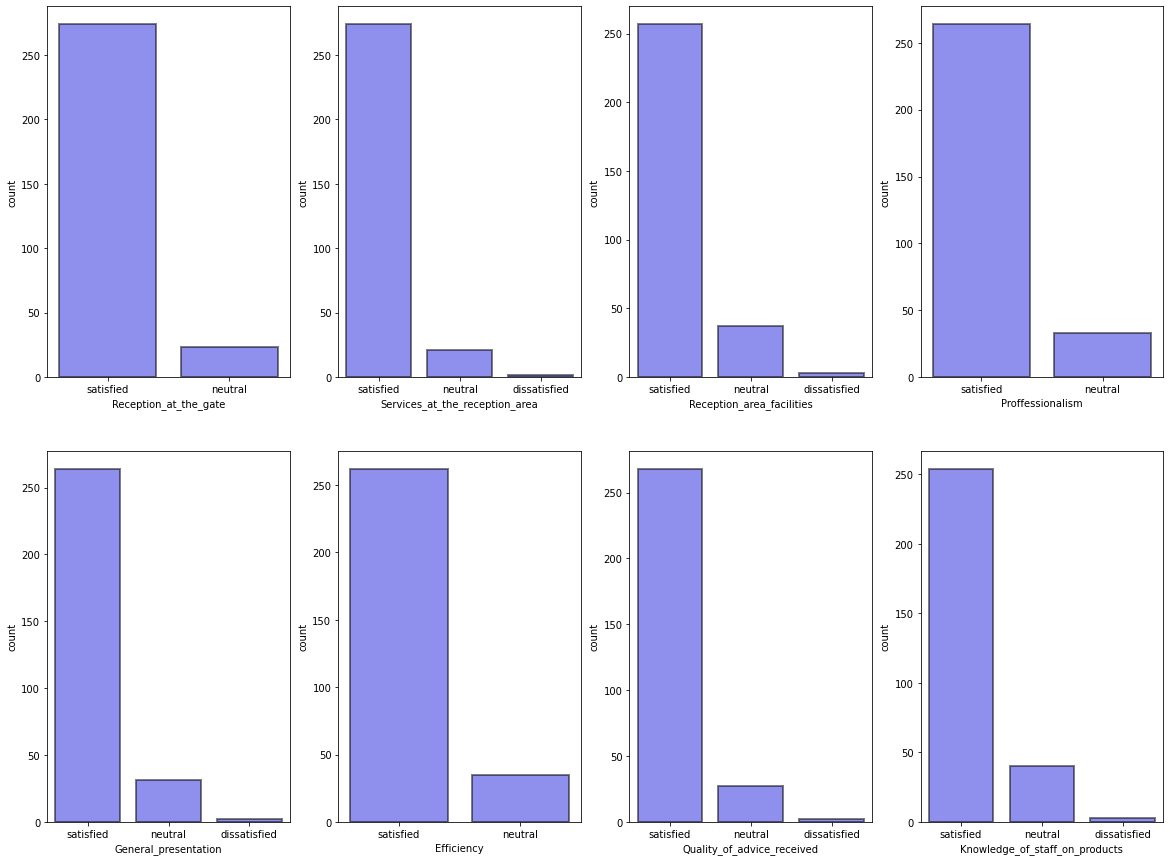

In [23]:
visuals1 = data[['Reception_at_the_gate','Services_at_the_reception_area', 'Reception_area_facilities','Proffessionalism', 'General_presentation', 'Efficiency','Quality_of_advice_received', 'Knowledge_of_staff_on_products']]
fig, axes = plt.subplots(2,4, figsize = (20,15))
for cols, ax in zip(visuals1, axes.flatten()):
  sns.countplot(data[cols], order = data[cols].value_counts().index, ax = ax, color = 'blue', alpha = 0.5, linewidth = 2, edgecolor = 'black');  

Comment: Add more options to select from, to get a better reflection of what people feel.


**Count per service/product sought**

In [24]:
diagnostic = sum(data['Diagnostic'] == 1)
payments = sum(data['Payments'] == 1)
procurement = sum(data['Procurement'] == 1)
scientific = sum(data['Scientific'] == 1)
academic_attachments = sum(data['Academic Attachments'] == 1)
information_requesting = sum(data['Information Requesting'] == 1)

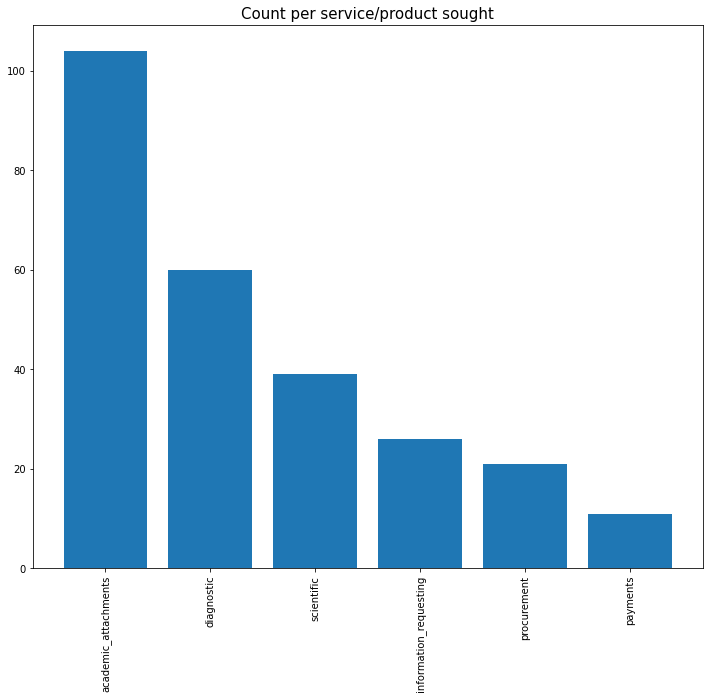

In [25]:
tick_label = ['academic_attachments', 'diagnostic', 'scientific', 'information_requesting', 'procurement', 'payments']
columns = [academic_attachments, diagnostic, scientific, information_requesting, procurement, payments]

fig, axes = plt.subplots(figsize = (12,10))
plt.bar(tick_label, columns)
plt.title('Count per service/product sought', size = 15)
plt.xticks(rotation = 90);

**Any problems encountered**

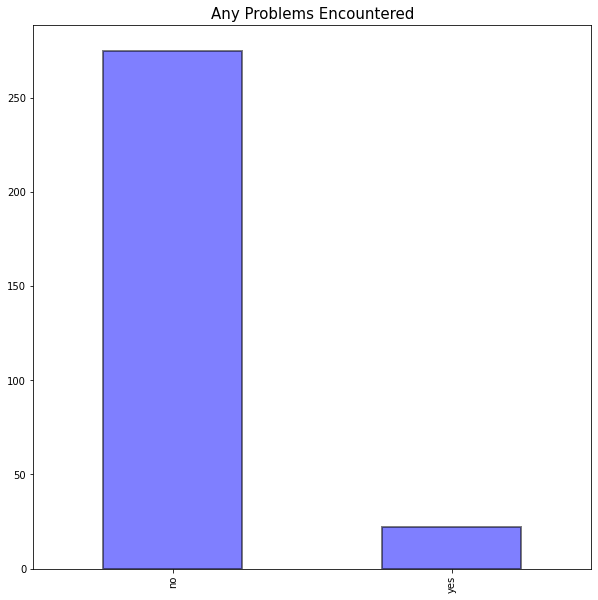

In [26]:
# Creating a new column 'Any Problems Encountered' to replace the 'Any problems Encountere Explain If Yes' column in the analysis.

data['Any_problems_encountered'] = data['Any_problems_encountered_explain_if_yes'] 
data['Any_problems_encountered'] = np.where(data['Any_problems_encountered'] == "no", 'no', 'yes')

# A visualization of the new 'Any problems encountered' column
fig, axes = plt.subplots(figsize = (10,10))
plt.title('Any Problems Encountered', size = 15)
data['Any_problems_encountered'].value_counts().plot(kind = 'bar', color = 'blue', linewidth = 2, edgecolor = 'black', alpha = 0.5);
# From this it is clear that most people do not encounter problems with the services offered.
# However some people still encountered problems.

**Overall Satisfaction**

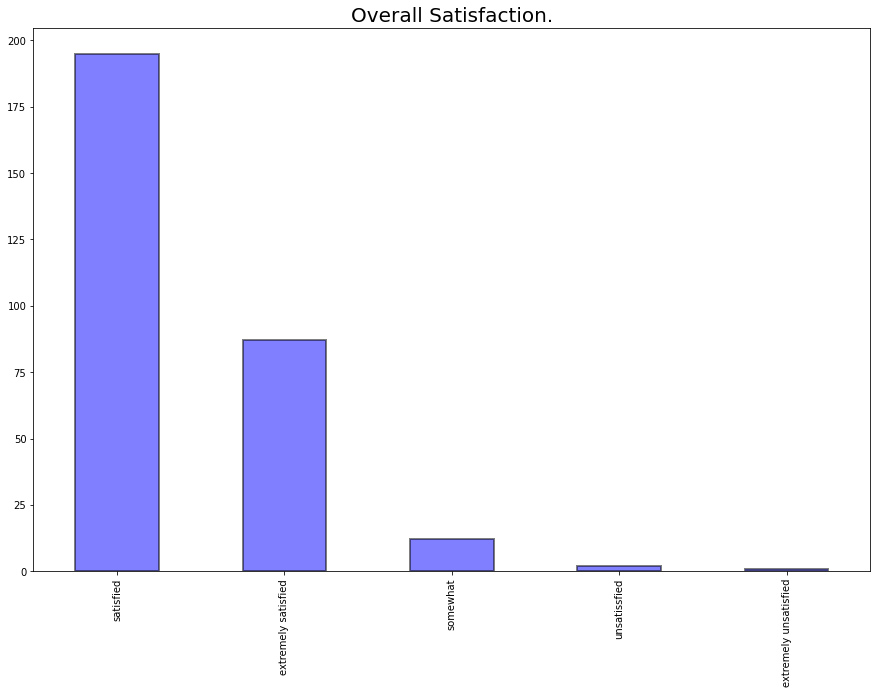

In [27]:
# Replacing the wrong spelling with the correct spelling.

data['Overall_satisfaction'] = data['Overall_satisfaction'].replace({'extremely satified':'extremely satisfied'})

# A visualization of the overall satisfaction column.

fig, axes = plt.subplots(figsize = (15,10))
data['Overall_satisfaction'].value_counts().plot(kind = 'bar', color = 'blue', alpha = 0.5, linewidth = 2, edgecolor = 'black')
plt.title('Overall Satisfaction.', size = 20);

# Most people were satisfied while very little were extremely unsatisfied.

#**Bi-variate Analysis**

**Recommendation of KEMRI products against Age**

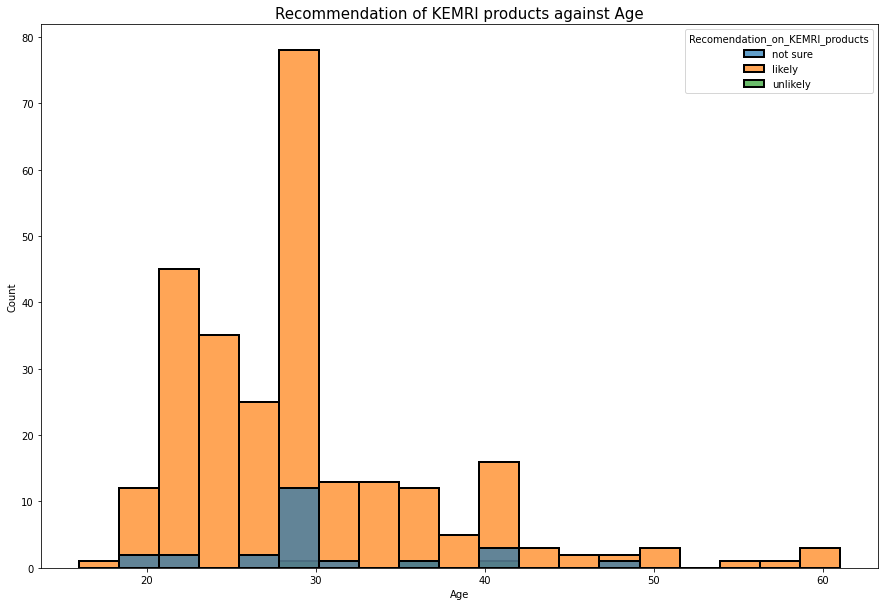

In [28]:
fig, axes = plt.subplots(figsize = (15,10))
sns.histplot(x = data['Age'], hue = data['Recomendation_on_KEMRI_products'], alpha = 0.7, linewidth = 2, edgecolor = 'black')
plt.title('Recommendation of KEMRI products against Age', size = 15);

**Recommendation of KEMRI products against Organisation Represented**

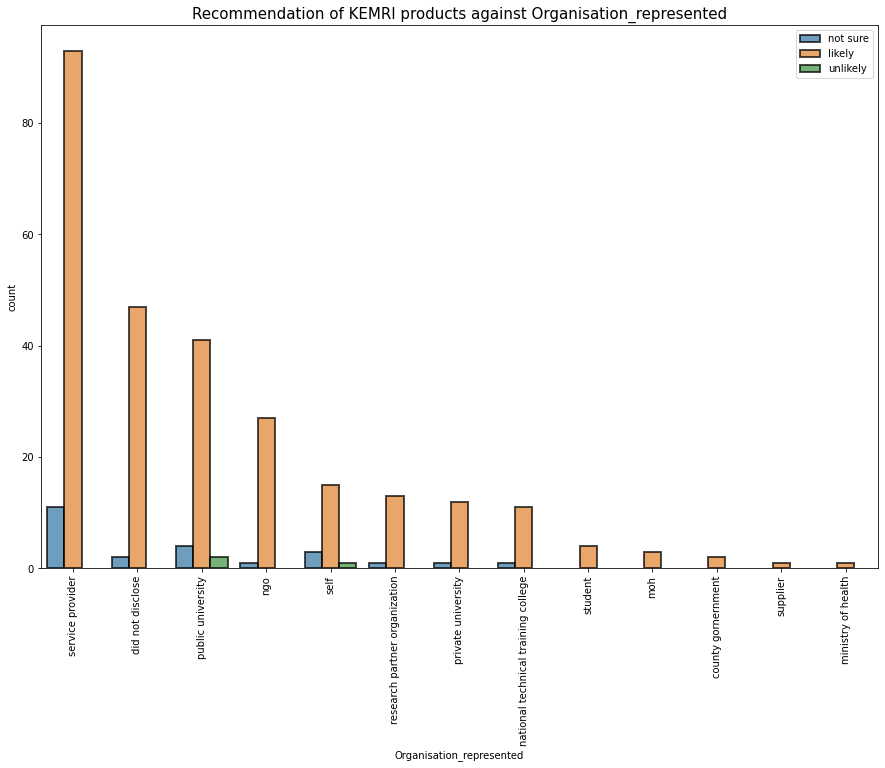

In [29]:
fig, axes = plt.subplots(figsize = (15,10))
sns.countplot(x = data['Organisation_represented'], hue = data['Recomendation_on_KEMRI_products'], order = data['Organisation_represented'].value_counts().index ,alpha = 0.7, linewidth = 2, edgecolor = 'black')
plt.title('Recommendation of KEMRI products against Organisation_represented', size = 15)
plt.xticks(rotation = 'vertical')
plt.legend(loc = 'upper right');

**Recommendation of KEMRI products against Department Visited**

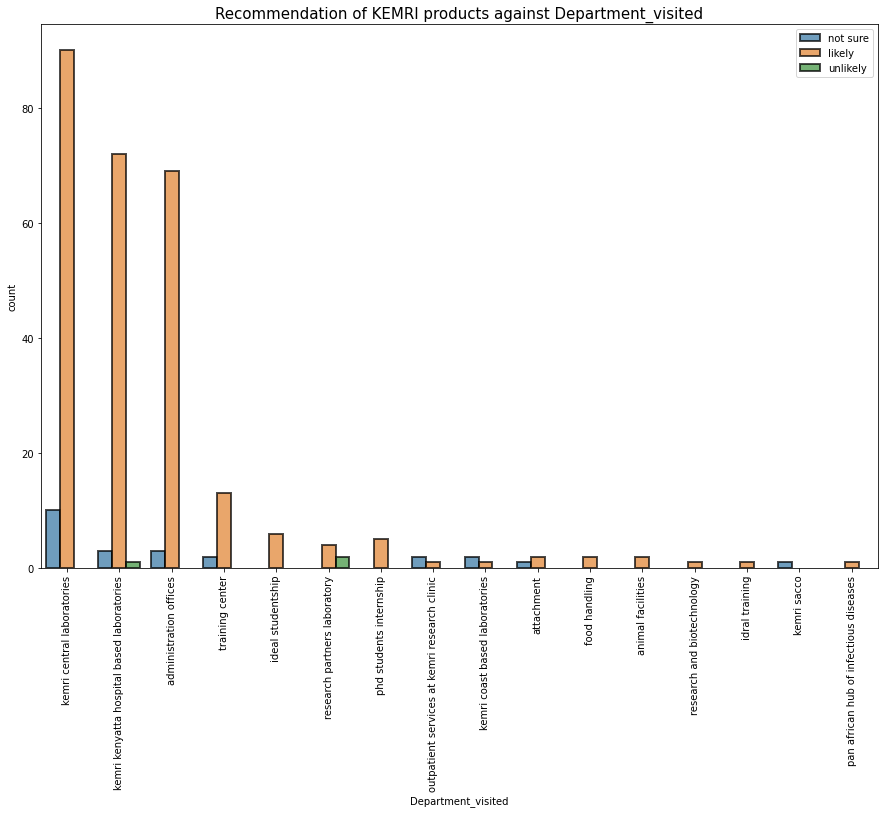

In [30]:
fig, axes = plt.subplots(figsize = (15,10))
sns.countplot(x = data['Department_visited'], hue = data['Recomendation_on_KEMRI_products'], order = data['Department_visited'].value_counts().index ,alpha = 0.7, linewidth = 2, edgecolor = 'black')
plt.title('Recommendation of KEMRI products against Department_visited', size = 15)
plt.xticks(rotation = 'vertical')
plt.legend(loc = 'upper right');

**Recommendation of KEMRI products against Overall Satisfaction**

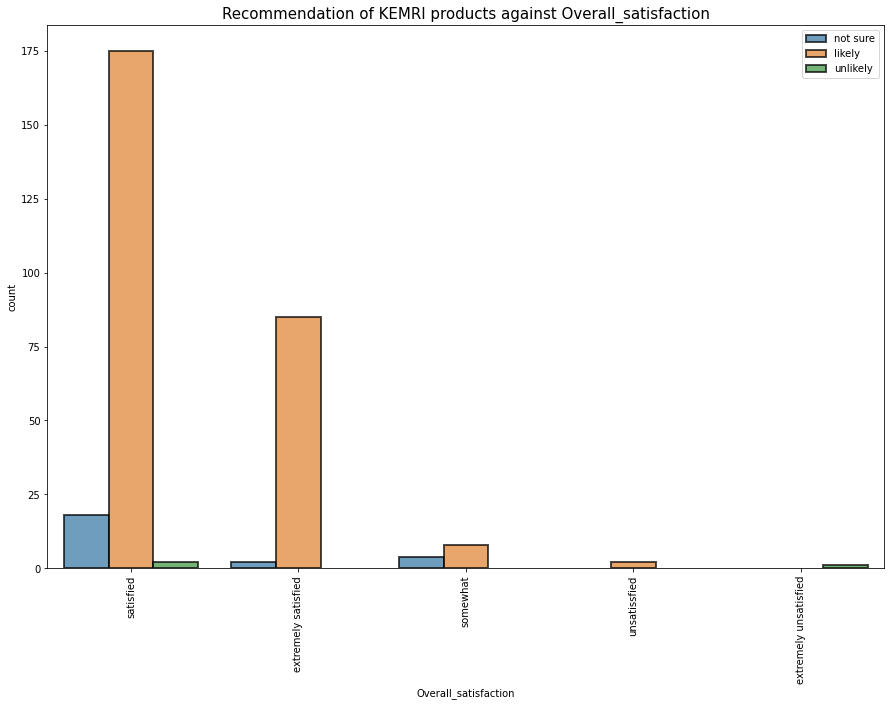

In [31]:
fig, axes = plt.subplots(figsize = (15,10))
sns.countplot(x = data['Overall_satisfaction'], hue = data['Recomendation_on_KEMRI_products'], order = data['Overall_satisfaction'].value_counts().index ,alpha = 0.7, linewidth = 2, edgecolor = 'black')
plt.title('Recommendation of KEMRI products against Overall_satisfaction', size = 15)
plt.xticks(rotation = 'vertical')
plt.legend(loc = 'upper right');

**Label Encoding**

In [32]:
data = data.drop(data[['Date','Serial_number', 'Others Services', 'Coment', 'How_to_improve_services', 'Any_problems_encountered']], axis = True)

In [33]:
from sklearn.preprocessing import LabelEncoder 
cols = data.select_dtypes('object').columns
le = LabelEncoder()
data[cols] = data[cols].apply(le.fit_transform)
data.head()

# Having the data in one simple format makes it easier for the end user.

,Department_visited,Gender,Age,Organisation_represented,Reception_at_the_gate,Services_at_the_reception_area,Reception_area_facilities,Proffessionalism,General_presentation,Efficiency,...,Recomendation_on_KEMRI_products,Diagnostic,Payments,Procurement,Scientific,Academic Attachments,Information Requesting,Any_problems_encountered_explain_if_yes,Overall_satisfaction,REFER_SOMEBODY_KEMRI
240,10,1,28,1,1,1,2,1,2,1,...,1,1,0,0,0,0,0,0,2,1
160,8,1,42,5,1,2,2,1,2,1,...,0,1,0,0,0,0,0,0,2,1
157,0,1,25,5,1,2,2,1,2,1,...,0,0,0,0,0,0,1,0,2,1
170,0,1,41,10,1,2,2,1,2,1,...,0,0,0,0,0,0,0,0,2,1
60,8,0,28,1,1,2,2,1,2,1,...,0,0,0,0,0,1,0,0,0,1


**Correlation with the Heat Map**

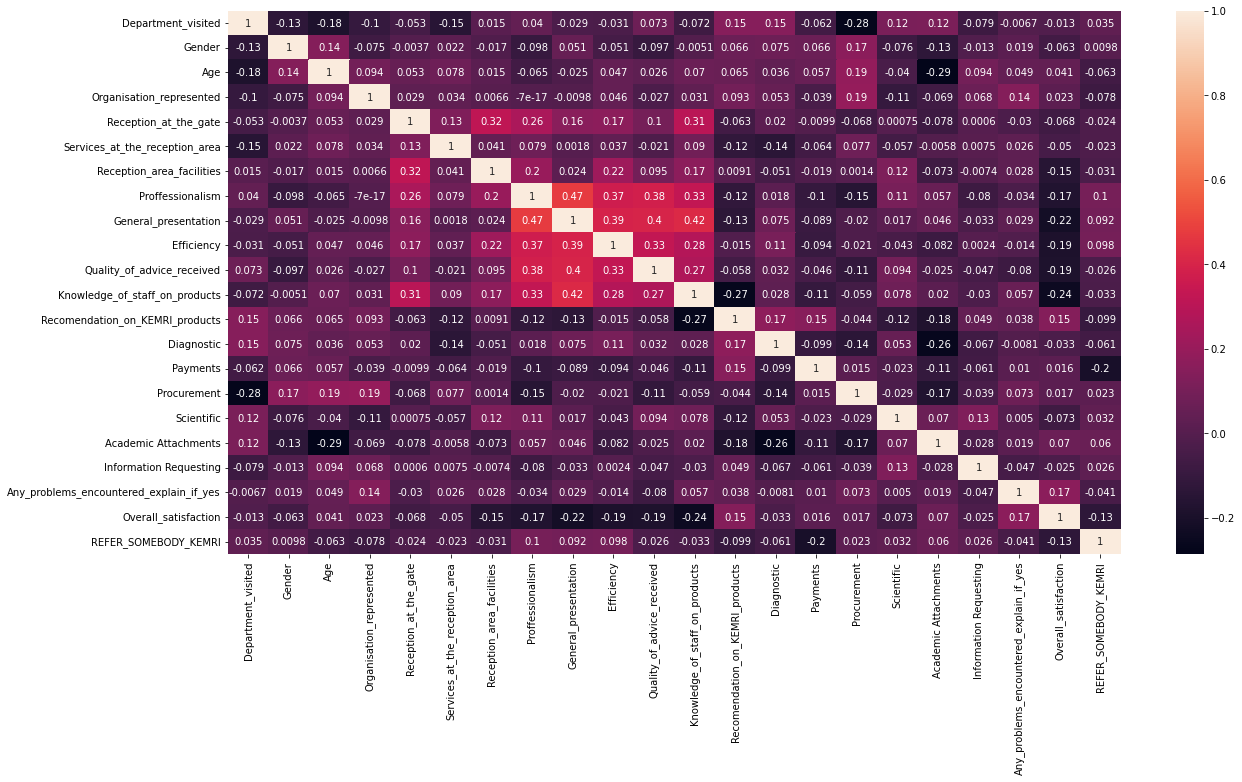

In [34]:
# Showing the correlation in the data using a heatmap. 
fig, axes = plt.subplots(figsize = (20,10))
sns.heatmap(data.corr(), annot = True);

# There is no large correlation in the data.
# However, some of the columns showing high correlation need a further investigation.
# It is seen that eg: the column General presentation is highly correlated to knowledge of staff on prodcts, quality of advice received, efficiency and professionalism.
# This could mean that an improvement in one of these columns really does affect other columns.
# This also applies to all the columns with a high correlation.

# **Training and Splitting the Data**

**Defining the data**

In [35]:
x = data.drop(['Recomendation_on_KEMRI_products'],axis = True )
y = data[['Recomendation_on_KEMRI_products']]

**Splitting and Training the data**

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

**Correcting Class Imbalance using Over-Sampling**

In [37]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_train, y_train = ros.fit_resample(x_train, y_train)

#**Modelling**


**Feature importance (Random Forest)**

In [38]:
# Feature importance using random forest to select the most important features
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

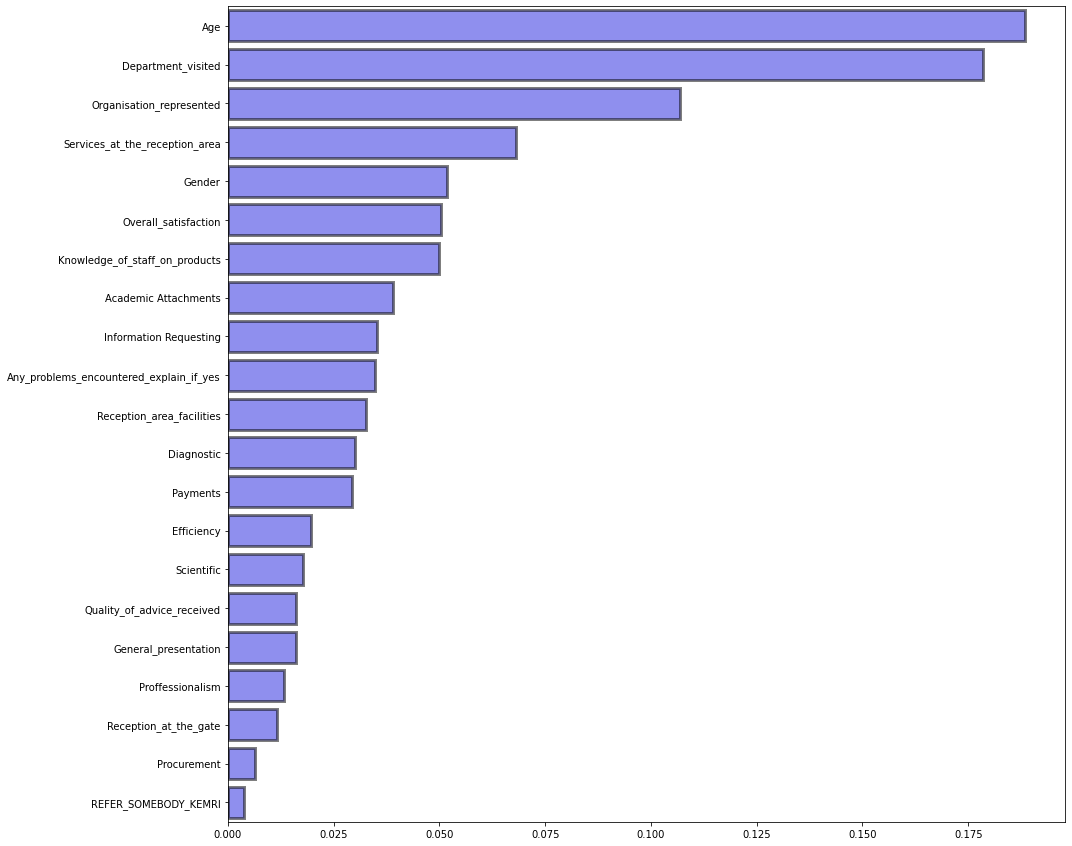

In [39]:
# Feature importance 
feature_importance = pd.Series(rfc.feature_importances_, x.columns).sort_values(ascending = False)
fig, axes = plt.subplots(figsize = (15,15))
sns.barplot(feature_importance, feature_importance.index, color = 'blue', alpha = 0.5, linewidth = 3, edgecolor = 'black');

# In creating a model that predicts whether a person would recommend KEMRI products to a potential customer, the first 10 rows would be the most ideal to use, so as to increase accuracy of the model.
# These rows are age, department visited, organisation represented, service at the reception area, knowledge of staff on products, gender, overall satisfaction, academic attachments, any problems encountered and reception area facilities.
# The other fields are important but not very important in prediction of the model.
# It is therefore wise to drop them.

In [40]:
x_train = x_train.drop(['Procurement', 'Proffessionalism', 'Reception_at_the_gate', 'Quality_of_advice_received', 'Efficiency', 'Scientific', 'General_presentation', 'Diagnostic', 'Reception_area_facilities'], axis = True)
x_test = x_test.drop(['Procurement', 'Proffessionalism', 'Reception_at_the_gate', 'Quality_of_advice_received', 'Efficiency', 'Scientific', 'General_presentation', 'Diagnostic', 'Reception_area_facilities'], axis = True)

**1. Random Forest Classifier**

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        85
           1       0.25      0.20      0.22         5

    accuracy                           0.92        90
   macro avg       0.60      0.58      0.59        90
weighted avg       0.91      0.92      0.92        90



**2. Logistic Regression**

In [42]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84        85
           1       0.09      0.40      0.15         5
           2       0.00      0.00      0.00         0

    accuracy                           0.73        90
   macro avg       0.35      0.38      0.33        90
weighted avg       0.91      0.73      0.80        90



**3. Naive Bayes**

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85        85
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         0

    accuracy                           0.71        90
   macro avg       0.32      0.25      0.28        90
weighted avg       0.92      0.71      0.80        90



**4. Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84        85
           1       0.09      0.40      0.15         5
           2       0.00      0.00      0.00         0

    accuracy                           0.73        90
   macro avg       0.35      0.38      0.33        90
weighted avg       0.91      0.73      0.80        90



In [ ]:
pip install lazypredict

In [46]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 16.04it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.74,0.77,0.76,0.81,0.01
LinearDiscriminantAnalysis,0.68,0.64,0.63,0.77,0.03
SVC,0.86,0.64,0.64,0.88,0.02
LogisticRegression,0.68,0.64,0.63,0.77,0.04
AdaBoostClassifier,0.49,0.64,0.64,0.61,0.11
NuSVC,0.84,0.64,0.64,0.88,0.03
RandomForestClassifier,0.92,0.58,0.58,0.92,0.18
KNeighborsClassifier,0.74,0.58,0.58,0.81,0.02
DecisionTreeClassifier,0.91,0.58,0.58,0.91,0.01


**Key Results.**

1. General Observation - Many people are satisfied with the services and products offered at KEMRI

2. Field Correlation - Correlation is not high in the fields defined. However, it is important to note that some fields display some form of high correlation. (These fields are:
professionalism, general presentation, efficiency, quality of advice received and knowledge of staff on products).

3. Service Sought - Most people came to KEMRI for academic attachments and diagnostics while very few came for procurement and payment services.

4. Organization Represented - Most people who needed KEMRI products were service
providers while the least were from the ministry of health.

5. Department Visited - Most people visited the KEMRI central laboratories, administrations office and KNH based laboratories while the department least visited was the pan African hub of infectious diseases.

6. Reception - There was a lot of dissatisfaction with the reception facilities and services offered. From the results, most dissatisfactions were registered in the reception facilities and
services.

**Recommendations.**

1. An improvement in one of the correlated fields would lead to an improvement in the other fields. In the chance that funds are not enough to improve all the fields at once, it would be wise to focus on the general presentation field as it is highly correlated with the other fields and an improvement in this field would lead to an improvement in the correlated fields.

2. An improvement in the reception facilities and reception services would make customers more satisfied.

3. An improvement in the laboratory facilities (central and KNH) would go a long way, since these are the most visited departments in KEMRI. People who visited the labs were also uncertain if they would recommend KEMRI products to other potential customers. An improvement in the labs would turn these uncertainties to satisfactions.

4. Employees should be keen when serving service providers as they are the most frequent customers, they are also the largest group that are uncertain if they would recommend other potential customers to KEMRI.

5. Since most customer come looking for academic attachment services, we would
recommend an improvement in attachment allocation programs to assist them have a
smoother experience at KEMRI.

6. In creating a model that predicts the chances of a person referring someone else to KEMRI products, it is recommended to only get the following information from a customer:
age, department visited, organisation represented, service at the reception area, knowledge of staff on products, gender, overall satisfaction, academic attachments, any problems encountered and reception area facilities. These are the most relevant information points.